<a href="https://colab.research.google.com/github/mrityu-jha/ML-DL-Challenges/blob/main/Holiday%20Season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Holiday Season HackerEarth/14feeca248c811eb.zip' -d '/content/'

In [4]:
data_dir = '/content/dataset'
TARGET_SIZE = ( 299, 299 )
BATCH_SIZE = 32
data_frame = pd.read_csv( os.path.join( data_dir, 'train.csv') )

In [5]:
data_frame.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [6]:
data_frame.describe()

,Image,Class
count,6469,6469
unique,6469,6
top,image9093.jpg,Miscellaneous
freq,1,2801


In [7]:
data_frame.isnull().sum()

Image    0
Class    0
dtype: int64

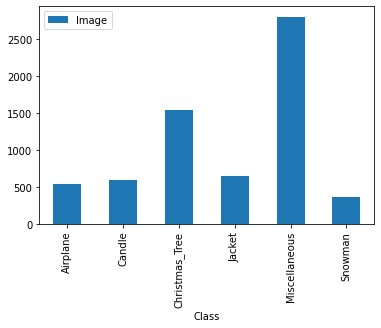

In [8]:
data_frame.groupby( ['Class'] ).count().plot.bar()

In [9]:
Y = data_frame[['Class']].copy()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, GlobalAveragePooling2D
from keras.applications import Xception, InceptionResNetV2
from keras.applications.xception import preprocess_input
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold, StratifiedKFold

In [11]:
def create_new_model( name_of_model ):
    if( name_of_model == 'xception' ):
        print( 'Loading Xception...' )
        inputs = tf.keras.Input( shape = ( TARGET_SIZE[0], TARGET_SIZE[1], 3 ) )
        base_model = Xception( include_top = False, pooling = 'avg', input_tensor = inputs )
        for layers in base_model.layers:
            layers.trainable = False
        x = base_model( base_model.inputs, training = False )
        x = Dropout( 0.5 )( x )
        x = Dense( 128, activation = 'relu' )( x )
        outputs = Dense( 6, activation = 'softmax' )( x )
        return keras.Model( inputs, outputs )
    elif( name_of_model == 'irnv2' ):
        print( 'Loading InceptionResNetV2...' )
        inputs = tf.keras.Input( shape = ( TARGET_SIZE[0], TARGET_SIZE[1], 3 ) )
        base_model = InceptionResNetV2( include_top = False, pooling = 'avg', input_tensor = inputs )
        for layers in base_model.layers:
            layers.trainable = False
        x = base_model( base_model.inputs, training = False )
        x = Dropout( 0.5 )( x )
        x = Dense( 128, activation = 'relu' )( x )      
        outputs = Dense( 6, activation = 'softmax' )( x )
        return keras.Model( inputs, outputs )

In [12]:
def plot_metrics( history ):
    
    # Plotting accuracy history
    plt.figure( figsize= (5,5 ) )
    plt.plot( history.history['accuracy'] )
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy Tracker', fontsize=15)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.legend(['training', 'validation'])
    plt.show()
    
    # Plotting accuracy history
    plt.figure( figsize= (5,5 ) )
    plt.plot( history.history['loss'] )
    plt.plot(history.history['val_loss'])
    plt.title('Loss Tracker', fontsize=15)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.legend(['Training', 'Validation'])
    plt.show()


In [13]:
skf = StratifiedKFold( n_splits = 5, shuffle = True, random_state = 42 )
val_accuracy = list()
val_loss = list()
data = dict()
fold_var = 1
model_name = ['xception', 'irnv2']
processing_function = { model_name[0] : keras.applications.xception.preprocess_input, model_name[1] : keras.applications.inception_resnet_v2.preprocess_input }

In [14]:
def get_model_name( name_of_model ):
    return 'model_'+ name_of_model +'.h5'

In [15]:
def return_gen( name_of_model ):   
    train_datagen = ImageDataGenerator( 
        horizontal_flip = True,
        zoom_range = 0.2,
        shear_range = 0.2,
        preprocessing_function = processing_function[ name_of_model ] )

    val_datagen = ImageDataGenerator( 
        preprocessing_function = processing_function[ name_of_model ] )
    
    return train_datagen, val_datagen

Loading xception .....
Found 5175 validated image filenames belonging to 6 classes.
Found 1294 validated image filenames belonging to 6 classes.
Loading Xception...
83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/20
162/162 [==============================] - 119s 680ms/step - loss: 0.8241 - accuracy: 0.7463 - val_loss: 0.3299 - val_accuracy: 0.8764

Epoch 00001: val_accuracy improved from -inf to 0.87635, saving model to /content/dataset/model_xception.h5
Epoch 2/20
162/162 [==============================] - 109s 672ms/step - loss: 0.3903 - accuracy: 0.8659 - val_loss: 0.3054 - val_accuracy: 0.8926

Epoch 00002: val_accuracy improved from 0.87635 to 0.89258, saving model to /content/dataset/model_xception.h5
Epoch 3/20
162/162 [==============================] - 109s 673ms/step - loss: 0.3367 - accuracy: 0.8813 - val_loss: 0.3157 - val_accuracy: 0.8856

Epoch 00003: val_accuracy did not improve from 0.89258
Epoch 4/20
162/162 [==============================] - 1

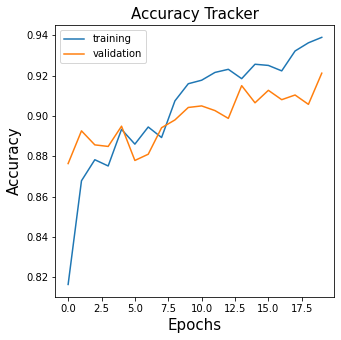

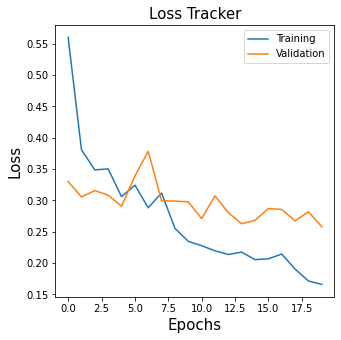

41/41 [==============================] - 10s 247ms/step - loss: 0.2579 - accuracy: 0.9212
Loading irnv2 .....
Found 5175 validated image filenames belonging to 6 classes.
Found 1294 validated image filenames belonging to 6 classes.
Loading InceptionResNetV2...
219062272/219055592 [==============================] - 1s 0us/step
Epoch 1/20
162/162 [==============================] - 129s 741ms/step - loss: 1.5952 - accuracy: 0.6632 - val_loss: 0.2830 - val_accuracy: 0.8964

Epoch 00001: val_accuracy improved from -inf to 0.89645, saving model to /content/dataset/model_irnv2.h5
Epoch 2/20
162/162 [==============================] - 117s 723ms/step - loss: 0.4054 - accuracy: 0.8663 - val_loss: 0.2991 - val_accuracy: 0.8972

Epoch 00002: val_accuracy improved from 0.89645 to 0.89722, saving model to /content/dataset/model_irnv2.h5
Epoch 3/20
162/162 [==============================] - 117s 719ms/step - loss: 0.4504 - accuracy: 0.8438 - val_loss: 0.3017 - val_accuracy: 0.8988

Epoch 00003: val_a

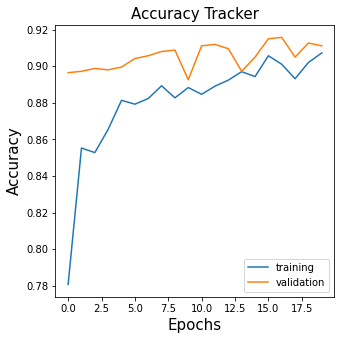

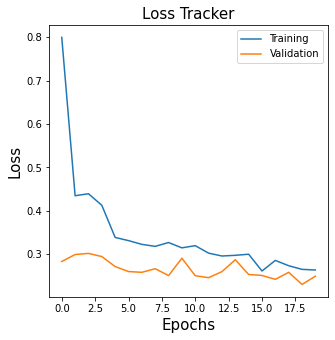

41/41 [==============================] - 13s 323ms/step - loss: 0.2419 - accuracy: 0.9158


In [16]:
for train_idx, val_idx in skf.split( np.zeros( Y.shape[0] ), Y ):
    
    train_df = data_frame.iloc[train_idx]
    val_df = data_frame.iloc[val_idx]

    name_of_model = model_name[ fold_var -1 ]
    print( 'Loading', name_of_model, '.....' )
    train_datagen, val_datagen = return_gen( name_of_model )

    train_data = train_datagen.flow_from_dataframe( dataframe = train_df, directory = os.path.join( data_dir, 'train/' ), x_col = "Image", y_col = "Class", target_size = TARGET_SIZE, class_mode = "categorical", shuffle = True, batch_size = BATCH_SIZE, seed = 42 )
    val_data = val_datagen.flow_from_dataframe( dataframe = val_df, directory = os.path.join( data_dir, 'train/' ), x_col = "Image", y_col = "Class", target_size = TARGET_SIZE, class_mode = "categorical", shuffle = True, batch_size = BATCH_SIZE, seed = 42 )
    
    
    mc = ModelCheckpoint( os.path.join( data_dir, get_model_name( name_of_model ) ), monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True )
    reduce_lr = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.5, patience = 3, verbose = 1 )

    model = create_new_model( model_name[ fold_var - 1 ] )

    opt = keras.optimizers.Adam( learning_rate = 1e-2 )
    model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
    history = model.fit( train_data, validation_data = val_data, epochs = 20, callbacks = [ mc, reduce_lr ], steps_per_epoch = train_data.__len__() )

    plot_metrics( history )
    model.load_weights( os.path.join( data_dir, get_model_name( name_of_model ) ) )
    results = model.evaluate( val_data )
    results = dict( zip( model.metrics_names, results ) )
    
    data[fold_var] = [ train_data, val_data ]
    
    val_accuracy.append( results['accuracy'] )
    val_loss.append( results['loss'] )
    fold_var += 1
    tf.keras.backend.clear_session()
    if( fold_var == 3 ):
        break

In [17]:
def fine_tune( name_of_model ):
    if( name_of_model == 'xception' ):
        print( 'Loading Xception...' )
        model = create_new_model( name_of_model )
        idx = model_name.index( name_of_model ) + 1
        model.load_weights( os.path.join( data_dir, get_model_name( name_of_model ) ) )
        # opt = keras.optimizers.Adam( learning_rate = 1e-2 )
        # model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
        # mc = ModelCheckpoint( os.path.join( data_dir, 'best_' + get_model_name( name_of_model ) ), monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True )
        # reduce_lr = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.5, patience = 3, verbose = 1 )
        # history = model.fit( data[idx][0], validation_data = data[idx][1], epochs = 20, callbacks = [ mc, reduce_lr ], steps_per_epoch = data[idx][0].__len__() )
        # print( model.summary() )
        for layers in model.layers[1].layers[126:]:
            layers.trainable = True
        print( model.summary() )
        opt = keras.optimizers.Adam( learning_rate = 1e-5 )
        model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
        mc = ModelCheckpoint( os.path.join( data_dir, 'best_' + get_model_name( name_of_model ) ), monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True )
        reduce_lr = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.5, patience = 3, verbose = 1 )
        history = model.fit( data[idx][0], validation_data = data[idx][1], epochs = 15, callbacks = [ mc, reduce_lr ], steps_per_epoch = data[idx][0].__len__() )

    elif( name_of_model == 'irnv2' ):
        print( 'Loading InceptionResNetV2...' )
        model = create_new_model( name_of_model )
        idx = model_name.index( name_of_model ) + 1
        model.load_weights( os.path.join( data_dir, get_model_name( name_of_model ) ) )
        # opt = keras.optimizers.Adam( learning_rate = 1e-2 )
        # model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
        # mc = ModelCheckpoint(  os.path.join( data_dir, 'best_' + get_model_name( name_of_model ) ), monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True )
        # reduce_lr = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.5, patience = 3, verbose = 1 )
        # history = model.fit( data[idx][0], validation_data = data[idx][1], epochs = 20, callbacks = [ mc, reduce_lr ], steps_per_epoch = data[idx][0].__len__() )
        # print( model.summary() )
        for layers in model.layers[1].layers[774:]:
            layers.trainable = True
        print( model.summary() )
        opt = keras.optimizers.Adam( learning_rate = 1e-5 )
        model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
        mc = ModelCheckpoint(  os.path.join( data_dir, 'best_' + get_model_name( name_of_model ) ), monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True )
        reduce_lr = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.5, patience = 3, verbose = 1 )
        history = model.fit( data[idx][0], validation_data = data[idx][1], epochs = 15, callbacks = [ mc, reduce_lr ], steps_per_epoch = data[idx][0].__len__() )


In [18]:
for name_of_model in model_name:
    fine_tune( name_of_model )

Loading Xception...
Loading Xception...
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 21,124,526
Trainable params: 5,011,846
Non-trainable params: 16,112,680
_________________________________________________________________
None
Epoch 1/15
162/162 [==============================] - 115s 692

In [ ]:
from distutils.dir_util import copy_tree
copy_tree( data_dir + '/test', data_dir + '/test_2/test' )

In [20]:
def return_test_gen( name_of_model ):
    test_datagen = ImageDataGenerator( 
        preprocessing_function = processing_function[ name_of_model ] )
    return test_datagen

In [21]:
def ensemble_prediction( name_of_model ):
    test_datagen = return_test_gen( name_of_model )
    test_data = test_datagen.flow_from_directory( 
        data_dir + '/test_2', 
        target_size = TARGET_SIZE, 
        color_mode = 'rgb', 
        shuffle = False, 
        batch_size = BATCH_SIZE,
        seed = 42 )
    return test_data

In [22]:
def return_best_model( name_of_model ):
    if( name_of_model == 'xception' ):
        print( 'Loading Xception...' )
        model = create_new_model( name_of_model )
        for layers in model.layers[1].layers[126:]:
            layers.trainable = True
        model.load_weights( os.path.join( data_dir, 'best_' + get_model_name( name_of_model ) ) )
        opt = keras.optimizers.Adam( learning_rate = 1e-5 )
        model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
        return model

    elif( name_of_model == 'irnv2' ):
        print( 'Loading InceptionResNetV2...' )
        model = create_new_model( name_of_model )
        for layers in model.layers[1].layers[774:]:
            layers.trainable = True
        model.load_weights( os.path.join( data_dir, 'best_' + get_model_name( name_of_model ) ) )
        opt = keras.optimizers.Adam( learning_rate = 1e-5 )
        model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
        return model

In [23]:
pred_ensemble = np.zeros( ( 3489, 6 ), dtype = 'float' )

In [24]:
for name_of_model in model_name:
    print( name_of_model )
    test_data = ensemble_prediction( name_of_model )
    model = return_best_model( name_of_model )
    pred_ensemble += model.predict( test_data , steps = test_data.__len__(), verbose = 1 )

xception
Found 3489 images belonging to 1 classes.
Loading Xception...
Loading Xception...
110/110 [==============================] - 29s 264ms/step
irnv2
Found 3489 images belonging to 1 classes.
Loading InceptionResNetV2...
Loading InceptionResNetV2...
110/110 [==============================] - 39s 327ms/step


In [25]:
pred_ensemble

array([[5.16632275e-06, 4.56136682e-07, 9.80599643e-07, 2.14574156e-04,
        1.99977714e+00, 1.67337392e-06],
       [1.99946779e+00, 5.54257101e-06, 1.53303372e-05, 2.61830609e-05,
        4.83467519e-04, 1.71692726e-06],
       [1.20926430e-07, 3.31051519e-09, 9.38269793e-07, 1.99979895e+00,
        1.99934388e-04, 2.62573952e-09],
       ...,
       [6.78809453e-10, 7.22653426e-08, 1.99992943e+00, 1.02114978e-07,
        6.68857901e-05, 3.37177728e-06],
       [5.06546039e-12, 1.99877745e+00, 1.21966037e-03, 7.55841691e-16,
        2.75935871e-06, 7.11620571e-08],
       [2.47840733e-04, 1.30175564e-04, 1.06814120e-03, 1.25438887e+00,
        7.44119670e-01, 4.52916733e-05]])

In [26]:
predicted_class_indices = np.argmax( pred_ensemble, axis = 1 )
labels = ( train_data.class_indices )
print( labels )
labels = dict((v,k) for k,v in labels.items() )
predictions = [labels[k] for k in predicted_class_indices]

{'Airplane': 0, 'Candle': 1, 'Christmas_Tree': 2, 'Jacket': 3, 'Miscellaneous': 4, 'Snowman': 5}


In [27]:
filenames = test_data.filenames
filenames = [ filenames[i].split('/')[1] for i in range( 0, len( filenames ) ) ]
results = pd.DataFrame( { "Image":filenames, "Class":predictions } )
results.to_csv( data_dir + '/results.csv', index = False )